# 파이썬 기초
## 데이터 사이언스 스쿨(https://datascienceschool.net) 을 기초로 합니다.
---------- 

### Pandas 소개
* R의 data.frame과 유사

* numpy와 유사
* 데이터의 인덱스(index)와 값(value) 표시 가능
   * 시리즈 = value + index

### 시리즈 생성
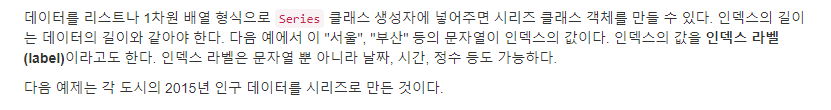

In [1]:
import pandas as pd
s = pd.Series([9904312, 3448737, 2890451, 2466052],
              index=["서울", "부산", "인천", "대구"])
s

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

In [2]:
pd.Series(range(10, 14)) # id , value

0    10
1    11
2    12
3    13
dtype: int64

In [3]:
list(range(10,14))

[10, 11, 12, 13]

In [4]:
s.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [5]:
s.values

array([9904312, 3448737, 2890451, 2466052], dtype=int64)

* name 속성을 활용 데이터의 이름 부여 가능 (Main Name)
* index.name 속성으로 시리지의 인덱스 네임 부여 가능 (index Name)

In [6]:
s.name = "인구" # main name
s.index.name = "도시"
s

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

### 시리즈 인덱싱
* id 와 index 모두 사용 가능
* 순서 바꿔서 s[[0,3,1]] 출력 가능
* 조건문 사용 가능
* : (콜론) 활용 가능
   * id : 콜론 뒤에 값도 출력
   * indexing : 일반적인 인덱싱과 같음

In [7]:
s[1], s["부산"] # id 와  index 모두 사용 가능

(3448737, 3448737)

In [8]:
s[[0, 3, 1]] # 순서 바꾸어서 출력 가능

도시
서울    9904312
대구    2466052
부산    3448737
Name: 인구, dtype: int64

In [9]:
s[["서울", "대구", "부산"]]

도시
서울    9904312
대구    2466052
부산    3448737
Name: 인구, dtype: int64

In [10]:
s[(250e4 < s) & (s < 500e4)]

도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64

In [11]:
s[1:3] # indexing은 일반적인 것과 같음

도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64

In [12]:
s["부산":"대구"] # id 사용시 : 뒤에 값도 출력 됨

도시
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [13]:
s0 = pd.Series(range(3), index=["a", "b", "c"])
s0

a    0
b    1
c    2
dtype: int64

In [14]:
s0.a

0

### 시리즈와 딕셔너리 자료형
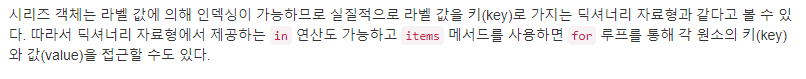
* 딕셔너리와 유사
   * id를 키(key)처럼 사용 가능
      * in
      * items - element의 key와 value 사용 가능

In [15]:
print(s)
print("서울" in s)
print("대전" in s)

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64
True
False


In [16]:
for k, v in s.items():
    print("%s = %d" % (k, v))

서울 = 9904312
부산 = 3448737
인천 = 2890451
대구 = 2466052


In [17]:
list(s.items()) # 튜플로 나옴

[('서울', 9904312), ('부산', 3448737), ('인천', 2890451), ('대구', 2466052)]

### 딕셔너리로 pd.시리즈 생성 가능
   * 순서 지정 : index = 리스트 옵션 추가

In [18]:
s2 = pd.Series({"서울": 9631482, "부산": 3393191, "인천": 2632035, "대전": 1490158})
s2

대전    1490158
부산    3393191
서울    9631482
인천    2632035
dtype: int64

In [19]:
s2 = pd.Series({"서울": 9631482, "부산": 3393191, "인천": 2632035, "대전": 1490158},
               index=["대전","부산", "서울", "인천"])
s2

대전    1490158
부산    3393191
서울    9631482
인천    2632035
dtype: int64

### id 기반 연산

In [20]:
s

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [21]:
s2

대전    1490158
부산    3393191
서울    9631482
인천    2632035
dtype: int64

* Nan(Not a Number)은 flaot에서만 가능함 주의
* float 자료형에서 사용 안하기 위해서 notnull 사용

In [22]:
print(s - s2) # 겹치는 것만 계산 
ds = s - s2
ds

대구         NaN
대전         NaN
부산     55546.0
서울    272830.0
인천    258416.0
dtype: float64


대구         NaN
대전         NaN
부산     55546.0
서울    272830.0
인천    258416.0
dtype: float64

In [23]:
print(s.values)
print(s2.values)
s.values - s2.values

[9904312 3448737 2890451 2466052]
[1490158 3393191 9631482 2632035]


array([ 8414154,    55546, -6741031,  -165983], dtype=int64)

In [24]:
ds.notnull() # 함수 사용

대구    False
대전    False
부산     True
서울     True
인천     True
dtype: bool

In [25]:
ds[ds.notnull()]

부산     55546.0
서울    272830.0
인천    258416.0
dtype: float64

* 증가율(%) 

In [26]:
rs = (s - s2) / s2 * 100
rs = rs[rs.notnull()]
rs

부산    1.636984
서울    2.832690
인천    9.818107
dtype: float64

### 데이터 처리
* update, add
* del

In [27]:
rs["부산"] = 1.63 # update
rs

부산    1.630000
서울    2.832690
인천    9.818107
dtype: float64

In [28]:
rs["대구"] = 1.41
rs

부산    1.630000
서울    2.832690
인천    9.818107
대구    1.410000
dtype: float64

In [29]:
del rs["서울"]
rs

부산    1.630000
인천    9.818107
대구    1.410000
dtype: float64

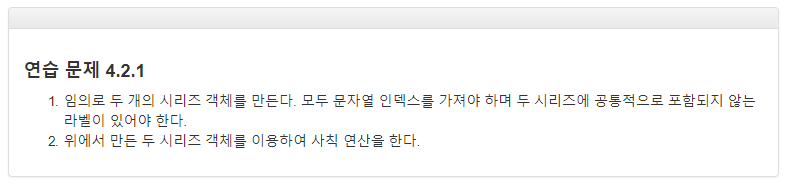

In [30]:
a = pd.Series([100,102,300,400],index=["a","b","c","d"])
a

a    100
b    102
c    300
d    400
dtype: int64

In [31]:
a1 = pd.Series({"b":10,"d":150,"e":700},index=["b","d","e"])
a1

b     10
d    150
e    700
dtype: int64

In [32]:
a - a1

a      NaN
b     92.0
c      NaN
d    250.0
e      NaN
dtype: float64

In [33]:
(a - a1)[pd.notnull(a - a1)]

b     92.0
d    250.0
dtype: float64

In [34]:
type(a)

pandas.core.series.Series

## Data-frame
* 데이터프래임 클래스 : 2차원 행렬 데이터의 인덱스를 붙임
   * row index와 column index에 분일 수 있음

### 데이터 프레임 생성
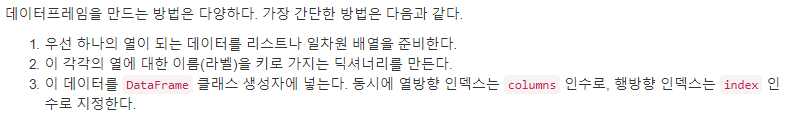

* R의 data.frame 과 유사

In [35]:
data = {
    "2015": [9904312, 3448737, 2890451, 2466052],
    "2010": [9631482, 3393191, 2632035, 2431774],
    "2005": [9762546, 3512547, 2517680, 2456016],
    "2000": [9853972, 3655437, 2466338, 2473990],
    "지역": ["수도권", "경상권", "수도권", "경상권"],
    "2010-2015 증가율": [0.0283, 0.0163, 0.0982, 0.0141]
}
columns = ["지역", "2015", "2010", "2005", "2000", "2010-2015 증가율"]
index = ["서울", "부산", "인천", "대구"]
df = pd.DataFrame(data, index=index, columns=columns) # R
df

,지역,2015,2010,2005,2000,2010-2015 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


* 공통 인덱스를 가지는 Column Series 를 Dictionary로 묶은 것
   * 데이터 값 : value
   * 열 인덱스 : columns
   * 행 인덱스 : index

In [36]:
df.values # 타입 = 객체

array([['수도권', 9904312, 9631482, 9762546, 9853972, 0.0283],
       ['경상권', 3448737, 3393191, 3512547, 3655437, 0.0163],
       ['수도권', 2890451, 2632035, 2517680, 2466338, 0.0982],
       ['경상권', 2466052, 2431774, 2456016, 2473990, 0.0141]], dtype=object)

In [37]:
df.values()

TypeError: 'numpy.ndarray' object is not callable

In [38]:
df.columns

Index(['지역', '2015', '2010', '2005', '2000', '2010-2015 증가율'], dtype='object')

In [39]:
df.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [40]:
df.index.name = "도시" # 인덱스 네임
df.columns.name = "변수" # 컬럼 네임
df

변수,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


### 데이터 프레임의 열 인덱싱
* df[] : 시리즈
* df[[]] : 데이터 프레임

In [41]:
print(type(df["지역"])) # 시리즈
df["지역"] # column의 키 값을 가지고 옮

<class 'pandas.core.series.Series'>


도시
서울    수도권
부산    경상권
인천    수도권
대구    경상권
Name: 지역, dtype: object

In [42]:
df[["2010", "2015"]]

변수,2010,2015
도시,,
서울,9631482,9904312
부산,3393191,3448737
인천,2632035,2890451
대구,2431774,2466052


In [43]:
print(type(df[["2010"]])) # 데이터 프레임
df[["2010"]]

<class 'pandas.core.frame.DataFrame'>


변수,2010
도시,
서울,9631482
부산,3393191
인천,2632035
대구,2431774


* 데이터프레임의 행 인덱싱 : 문자형인 id 경우 순서 인덱싱 사용 불가
   * 숫자형 id 경우 사용 가능

In [44]:
df[0]

KeyError: 0

In [45]:
import numpy as np
print(np.arange(12).reshape(3,4))
df2 = pd.DataFrame(np.arange(12).reshape(3, 4))
df2

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [46]:
df2[2] # column indexing

0     2
1     6
2    10
Name: 2, dtype: int32

In [47]:
df2[:][2]

0     2
1     6
2    10
Name: 2, dtype: int32

### 데이터 프레임의 열 처리
* numpy.array의 대부분의 속성과 메서드 지원
* update
* del
   * 변수 -> id : df[변수][id]

In [48]:
df

변수,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


In [49]:
df.T

도시,서울,부산,인천,대구
변수,,,,
지역,수도권,경상권,수도권,경상권
2015,9904312,3448737,2890451,2466052
2010,9631482,3393191,2632035,2431774
2005,9762546,3512547,2517680,2456016
2000,9853972,3655437,2466338,2473990
2010-2015 증가율,0.0283,0.0163,0.0982,0.0141


In [50]:
df["2010-2015 증가율"] = df["2010-2015 증가율"] * 100
df

변수,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,2.83
부산,경상권,3448737,3393191,3512547,3655437,1.63
인천,수도권,2890451,2632035,2517680,2466338,9.82
대구,경상권,2466052,2431774,2456016,2473990,1.41


In [51]:
df["2005-2010 증가율"] = ((df["2010"] - df["2005"]) / df["2005"] * 100).round(2)
df

변수,지역,2015,2010,2005,2000,2010-2015 증가율,2005-2010 증가율
도시,,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,2.83,-1.34
부산,경상권,3448737,3393191,3512547,3655437,1.63,-3.40
인천,수도권,2890451,2632035,2517680,2466338,9.82,4.54
대구,경상권,2466052,2431774,2456016,2473990,1.41,-0.99


In [52]:
del df["2010-2015 증가율"]
df

변수,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34
부산,경상권,3448737,3393191,3512547,3655437,-3.40
인천,수도권,2890451,2632035,2517680,2466338,4.54
대구,경상권,2466052,2431774,2456016,2473990,-0.99


In [53]:
df["2015"]["서울"]


9904312

In [54]:
df["서울"]

KeyError: '서울'

### 행 인덱싱

In [55]:
print(df[:1]["지역"])
df[:1]

도시
서울    수도권
Name: 지역, dtype: object


변수,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34


In [56]:
print(df[1:3])
df[1:2]

변수   지역     2015     2010     2005     2000  2005-2010 증가율
도시                                                        
부산  경상권  3448737  3393191  3512547  3655437          -3.40
인천  수도권  2890451  2632035  2517680  2466338           4.54


변수,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
부산,경상권,3448737,3393191,3512547,3655437,-3.4


In [57]:
df["서울":"부산"]

변수,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34
부산,경상권,3448737,3393191,3512547,3655437,-3.40


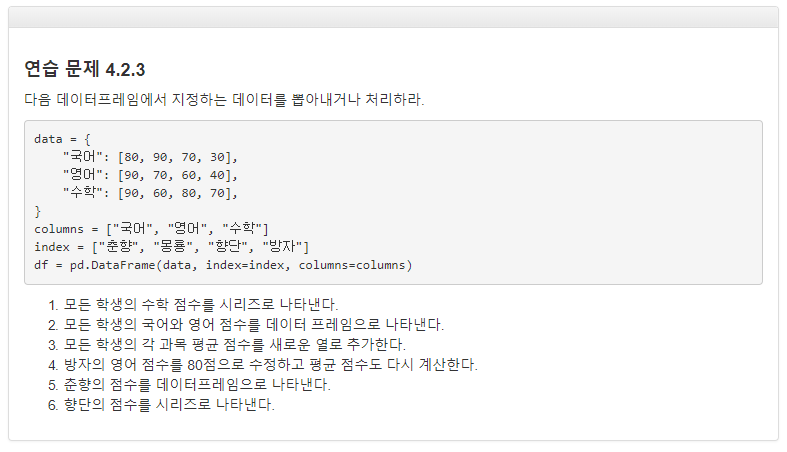

In [58]:
data = {
    "국어": [80, 90, 70, 30],
    "영어": [90, 70, 60, 40],
    "수학": [90, 60, 80, 70],
}
columns = ["국어", "영어", "수학"]
index = ["춘향", "몽룡", "향단", "방자"]
df = pd.DataFrame(data, index=index, columns=columns)

In [59]:
df

,국어,영어,수학
춘향,80,90,90
몽룡,90,70,60
향단,70,60,80
방자,30,40,70


In [60]:
math = df["수학"]
print(type(math))
math

<class 'pandas.core.series.Series'>


춘향    90
몽룡    60
향단    80
방자    70
Name: 수학, dtype: int64

In [61]:
Eng = df[["영어"]]
Kor = df[["국어"]]
Eng

,영어
춘향,90
몽룡,70
향단,60
방자,40


In [62]:
Kor

,국어
춘향,80
몽룡,90
향단,70
방자,30


In [63]:
df["평균 점수"] = ((math.values + Eng.values.reshape(-1) + Kor.values.reshape(-1))/3).round(3)

In [64]:
df

,국어,영어,수학,평균 점수
춘향,80,90,90,86.667
몽룡,90,70,60,73.333
향단,70,60,80,70.000
방자,30,40,70,46.667


In [65]:
df.loc["방자","영어"] = 80

In [66]:
df

,국어,영어,수학,평균 점수
춘향,80,90,90,86.667
몽룡,90,70,60,73.333
향단,70,60,80,70.000
방자,30,80,70,46.667


In [67]:
df["평균 점수"] = ((df["국어"] + df["영어"] + df["수학"])/3).round(3)

In [68]:
df

,국어,영어,수학,평균 점수
춘향,80,90,90,86.667
몽룡,90,70,60,73.333
향단,70,60,80,70.000
방자,30,80,70,60.000


In [69]:
df[:"춘향"]

,국어,영어,수학,평균 점수
춘향,80,90,90,86.667


In [70]:
print(type(df.loc["춘향",:]))
df.loc["춘향",:]

<class 'pandas.core.series.Series'>


국어       80.000
영어       90.000
수학       90.000
평균 점수    86.667
Name: 춘향, dtype: float64